<a href="https://colab.research.google.com/github/JvNeo/Estudo_Pandas/blob/main/Pandas_limpeza_e_tratamento_de_dados_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conhecendo os dados

In [60]:
import pandas as pd

In [61]:
dados_churn = pd.read_json('/content/drive/MyDrive/ALURA/Pandas: limpeza e tratamento de dados/dataset-telecon.json')
dados_churn.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [62]:
dados_churn['conta'][0]

{'contrato': None,
 'faturamente_eletronico': None,
 'metodo_pagamento': None,
 'cobranca': {'mensal': None, 'Total': None}}

In [63]:
pd.json_normalize(dados_churn['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [64]:
pd.json_normalize(dados_churn['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


Transformando dados em uma tabela
---

Método jgon_normalize():
* Em um DataFrame > normaliza apenas uma coluna
* Em um objeto JSON > normaliza todas as colunas aninhadas de uma vez só

In [65]:
import json

# biblioteca JSON possibilita maior facilidade para trabralhar com objetos json
# além de trasnformar objetos Python em JSON e vice-versa

In [66]:
with open('/content/drive/MyDrive/ALURA/Pandas: limpeza e tratamento de dados/dataset-telecon.json') as f:
  json_bruto = json.load(f)

In [67]:
json_bruto

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [68]:
dados_normalizados = pd.json_normalize(json_bruto)
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


# Entendendo os dados

Um dicionário de dados é uma ferramenta importante para a gestão de dados em uma empresa, pois ele descreve as informações que são armazenadas, ajudando a garantir que os dados sejam consistentes e precisos. A gestão desses dados ajuda a equipe de análise de dados a compreender melhor as informações disponíveis e tomar decisões mais informadas e precisas.

Segue abaixo o dicionário dos dados usados durante o curso:

**Cliente**

* genero: gênero (masculino e feminino)
* idoso: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos
* `parceiro`: se o(a) cliente possui ou não um(a) parceiro ou parceira
* `dependentes`: se o(a) cliente possui ou não dependentes
* `tempo_servico`: meses de contrato do(a) cliente


**Serviço de telefonia**

* `servico_telefone`: assinatura de serviço telefônico
* `varias_linhas`: assinatura de mais de uma linha de telefone


**Serviço de internet**

* `servico_internet`: assinatura de um provedor internet
* `seguranca_online`: assinatura adicional de segurança online
* `backup_online`: assinatura adicional de backup online
* `protecao_dispositivo`: assinatura adicional de proteção no dispositivo
* `suporte_tecnico`: assinatura adicional de suporte técnico, menos tempo de espera
* `tv_streaming`: assinatura de TV a cabo
* `filmes_streaming`: assinatura de streaming de filmes


**Conta**

* `contrato`: tipo de contrato
* `faturamente_eletronico`: se o(a) cliente prefere receber a fatura online
* `metodo_pagamento`: forma de pagamento
* `cobranca.mensal`: total de todos os serviços do(a) cliente por mês
* `cobranca.Total`: total gasto pelo(a) cliente


In [69]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [70]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

ValueError: could not convert string to float: ' '

In [71]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,


In [72]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [73]:
idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index

In [74]:
dados_normalizados.loc[idx, "conta.cobranca.Total"] = dados_normalizados.loc[idx, "conta.cobranca.mensal"] * 24

In [75]:
dados_normalizados.loc[idx, "cliente.tempo_servico"] = 24

In [76]:
dados_normalizados.loc[idx][
['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [77]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype(float)

In [78]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

# Identificando e tratando strings vazias

In [79]:
for col in dados_normalizados.columns:
  print(f'Coluna: {col}')
  print(dados_normalizados[col].unique())
  print('-' * 30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [80]:
dados_normalizados.query('Churn == ""')

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [81]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [82]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   object

In [83]:
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [84]:
dados_sem_vazio

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


# Trabalhando com dados duplicados e nulos

Identificando e tratando dados duplicados
---

Amostras duplicadas são linhas que contêm exatamente os mesmos valores em todas as colunas. Ou seja, são cópias exatas de outras linhas presentes no conjunto de dados. Essas amostras podem ser geradas por vários motivos, como erros de importação de dados ou redundância nas fontes de dados.
Para identificar essas amostras duplicadas nós utilizamos o método duplicated.
Esse método irá retornar uma series booleana que são valores TRUE ou FALSE, onde TRUE são amostras duplicadas e FALSE são amostras não duplicadas


In [85]:
dados_sem_vazio.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7113,True
7114,True
7115,True
7116,True


In [86]:
dados_sem_vazio.duplicated().sum()

np.int64(75)

In [87]:
filtro_duplicadas = dados_sem_vazio.duplicated()
filtro_duplicadas

,0
0,False
1,False
2,False
3,False
4,False
...,...
7113,True
7114,True
7115,True
7116,True


In [88]:
dados_sem_vazio[filtro_duplicadas]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [89]:
# método drop_duplicates do pandas remove as amostras duplicadas
# parametro inplace para que o df já seja alterado sem a necessidade de fazer atribuição

dados_sem_vazio.drop_duplicates(inplace=True)

In [90]:
dados_sem_vazio.duplicated().sum()

np.int64(0)

# Identificando e substituindo dados nulos

Dados nulos > valores ausentes ou desconhecidos na base de dados

In [91]:
dados_sem_vazio.isna()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Quantos e quais são dados nulos?**
Para isso, em uma nova célula, vamos copiar o código anterior e acrescentar .sum() ao final. Desse modo, vamos somar a quantidade de amostras nulas por coluna.

In [92]:
dados_sem_vazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,8
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


Com esse retorno, verificamos que nas colunas "churn" e "cliente.genero" existem 0 amostras vazias, enquanto na coluna "cliente.tempo_servico" existem 8 amostras nulas.

Em suma, existem colunas que possuem valores nulos e outras que não possuem. Mas, como verificar o total de valores nulos presentes no banco de dados?

Para isso, vamos copiar o código que fizemos com o método sum() e acrescentar outro .sum() ao final. Esse segundo sum() vai somar a quantidade total de valores nulos no banco de dados.

In [93]:
dados_sem_vazio.isna().sum().sum()

np.int64(114)

Após executar a célula, temos um total de 114 valores nulos no conjunto de dados. Mas, essa não é a quantidade de amostras com valores nulos, porque algumas amostras podem possuir mais de um valor nulo.

Por exemplo, na saída onde tivemos o dataframe de True e False, verificamos que a amostra de índice 0 possui 5 valores True. Ou seja, os valores desde a coluna "conta.contrato" até "conta.cobranca.Total" são nulos. Cada um desses valores conta para a soma de 114, mas são de apenas uma amostra.

Como obter a informação de quantas amostras diferentes possuem dados nulos?

Para isso, vamos fazer um filtro ao escrever dados_sem_vazio[]. Entre os colchetes, repetimos dados_sem_vazio e usamos o método .isna().any(), passando axis igual à 1 para fazer referência a coluna.

In [94]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
9,0016-QLJIS,nao,feminino,0,sim,sim,NaN,sim,sim,DSL,...,sim,sim,sim,sim,sim,dois anos,sim,cheque pelo correio,90.45,5957.90
176,0282-NVSJS,nao,feminino,1,sim,sim,NaN,nao,sem servico de telefone,DSL,...,nao,nao,sim,nao,nao,mes a mes,sim,cheque pelo correio,29.30,355.90
181,0295-QVKPB,nao,masculino,0,nao,nao,NaN,sim,nao,DSL,...,nao,sim,sim,sim,nao,mes a mes,sim,cartao de credito (automatico),63.95,318.10
437,0639-TSIQW,sim,feminino,0,nao,nao,67.0,sim,sim,fibra otica,...,sim,sim,nao,sim,nao,None,None,cartao de credito (automatico),NaN,6886.25
751,1095-WGNGG,nao,feminino,0,sim,nao,NaN,sim,sim,fibra otica,...,sim,nao,nao,sim,sim,dois anos,sim,transferencia bancaria (automatica),101.05,5971.25
963,1396-QWFBJ,sim,feminino,0,sim,sim,21.0,sim,nao,fibra otica,...,sim,nao,nao,nao,nao,None,sim,None,NaN,1565.70
1604,2333-KWEWW,nao,masculino,0,nao,nao,18.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,None,nao,None,20.05,NaN
1605,2335-GSODA,nao,masculino,0,nao,sim,23.0,nao,sem servico de telefone,DSL,...,nao,sim,sim,nao,nao,None,nao,None,NaN,NaN
1606,2338-BQEZT,nao,feminino,0,nao,nao,55.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,None,sim,cartao de credito (automatico),NaN,NaN


Esse código retornou um dataframe com 45 linhas que correspondem as amostras que contêm pelo menos um valor nulo em alguma das colunas. É isso que o any(axis=1) significa.

Mas, o que podemos fazer com essas 45 amostras que contêm algum dado nulo? Temos duas opções:

* Remover as amostras;
* Substituir os dados nulos por outros valores.

**Substituição dos dados nulos**


Primeiro, vamos analisar o caso de fazer o preenchimento dos nulos por outros valores. Afinal, se removemos amostras, também removemos informações que podem ser relevantes.

Se voltamos a analisar a tabela que nos informa as colunas que possuem dados nulos, percebemos que a coluna "cliente.tempo_servico" que contém `8` valores nulos tem relação com outras colunas.

Se dividimos a coluna "conta.cobranca.Total" pela coluna "conta.cobranca.mensal", obtemos o valor da coluna "cliente.tempo_servico".

Por isso, vamos verificar quais amostras tem nulos na coluna "cliente.tempo_servico". Para isso, digitamos o dataframe `dados_sem_vazio[]` e, entre colchetes e aspas, selecionamos a coluna que queremos, `cliente.tempo_servico`. Fora dos colchetes, adicionamos `.isna()`.

In [95]:
filtro = dados_sem_vazio['cliente.tempo_servico'].isna()

Após executar, o filtro foi criado sem retornos visíveis.

Agora, podemos usar esse filtro. Podemos fazer `dados_sem_vazio[filtro]` para filtrar o dataframe inteiro.

Mas, queremos verificar somente as três colunas com relações entre si. Por isso, abrimos colchetes para selecionar as colunas e depois abrimos outros colchetes para selecionar a seguinte lista de colunas: `cliente.tempo_servico`, `conta.cobranca.mensal`, `conta.cobranca.Total`. Todas entre aspas.

In [96]:
dados_sem_vazio[filtro][['cliente.tempo_servico','conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


Os valores da coluna "cliente.tempo_servico" são representados pela `NaN` que significa not a number (não é um número). E também temos todos os valores das colunas "conta.cobranca.mensal" e "conta.cobranca.Total". Consequentemente, temos informação suficiente para substituir os valores de "cliente.tempo_servico".

Por exemplo, para calcular o valor de "cliente.tempo_servico" da amostra de índice `9`, poderíamos dividir `5957.90` por `90.45` que resultaria em um valor quebrado de meses.



In [97]:
import numpy as np

np.ceil(5957.90/90.45)

np.float64(66.0)

Só que os valores já presentes em "cliente.tempo_servico" não são quebrados. Portanto, devemos arrendondar esse valor para cima. Para isso, vamos utilizar um método da biblioteca NumPy.

Primeiro, vamos importar a biblioteca com `import numpy`, apelidando-a de `np`. Agora, podemos utilizar o método `np.ceil()` na divisão que realizamos.

Dessa forma, o número foi arrendondado para cima e agora tem o valor de `66.0`.

O que vamos fazer e quais são os passos? Primeiro, vamos dividir a coluna "conta.cobranca.Total" pela coluna "conta.cobranca.mensal". Vamos colocar essa divisão dentro do método `np.ceil()` para arrendondar para cima caso o valor seja quebrado. Por fim, vamos colocar o valor desse arredondamento no lugar dos valores `NaN` da coluna "cliente.tempo_servico".

Para isso, em uma nova célula, fazemos referência a coluna que queremos preencher `dados_sem_vazio['cliente.tempo_servico']`. Fora dos colchetes, utilizamos o método do Pandas chamado `.fillna()` para preencher dados nulos.

Na abertura dos parênteses de `fillna()`, vamos dar um "Enter" para fazer a quebra de linha e melhorar a visualização. Como queremos arrendondar o resultado da divisão, vamos escrever o método `np.ceil()` dentro do `fillna()` e também dar um "Enter" na abertura dos parênteses.

Dentro do `np.ceil()`, vamos escrever a `coluna dados_sem_vazio['conta.cobranca.Total']`, barra de divisão e a coluna `dados_sem_vazio['conta.cobranca.mensal']`. Com isso, o resultado da divisão será colocado onde tem nulos na coluna "cliente.tempo_servico".

Fora do `np.ceil()`, mas dentro de `fillna()`, vamos colocar o parâmetro `inplace` igual à `True` para fazer a modificação inloco, ou seja, no dataframe `dados_sem_vazio`.

In [98]:
dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(
        dados_sem_vazio['conta.cobranca.Total']/dados_sem_vazio['conta.cobranca.mensal']
    ), inplace=True
)

<ipython-input-98-250c31e4b108>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_sem_vazio['cliente.tempo_servico'].fillna(


Executamos a célula sem apresentar nenhum erro.

Agora, vamos conferir se essa divisão e substituição realmente funcionou. Para isso, vamos copiar o código onde utilizamos o filtro para mostrar as três colunas que trabalhamos.

In [99]:
dados_sem_vazio[filtro][['cliente.tempo_servico','conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,66.0,90.45,5957.90
176,13.0,29.30,355.90
181,5.0,63.95,318.10
751,60.0,101.05,5971.25
3523,14.0,76.10,1054.80
5273,6.0,20.60,116.60
5276,49.0,73.85,3581.40
6134,29.0,69.05,1958.45


Perceba que agora a coluna "cliente.tempo_servico" tem valores não nulos. Por exemplo, valores de `66.0` na primeira amostra, `13.0` na segunda amostra, `5.0` na terceira amostra e assim por diante. Isso significa que a nossa divisão foi bem sucedida e o arredondamento também, pois o valor não está quebrado.

Mas, será que não existe mais valor nulo nessa coluna? Vamos fazer a soma novamente com o método `isna()`:

In [100]:
dados_sem_vazio.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,0
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


Agora, não existem mais dados nulos na coluna "cliente.tempo_servico". Conseguimos fazer a tratativa ao inserir os valores corretos sem perder informações.

Contudo, ainda existem outras colunas no banco de dados que possuem valores nulos. Por exemplo, a coluna "conta.contrato" tem `31` valores nulos

# Retirando dados nulos

**Valor mais frequente**

Como precisamos descobrir qual é esse valor mais frequente, vamos utilizar um método do Pandas chamado `value_counts()`.

Em uma nova linha do notebook do Google Colab, vamos digitar `dados_sem_vazio` e passar entre colchetes e aspas simples a coluna que queremos analisar, `conta.contrato`. Fora dos colchetes, vamos adicionar o método` .value_counts()`.

In [101]:
dados_sem_vazio['conta.contrato'].value_counts()

,count
conta.contrato,
mes a mes,3861
dois anos,1688
um ano,1463


Ao executar a célula com "Shift + Enter", a forma de contrato mais frequente é o` mes a mes` que aparece `3861` vezes.

Assim, poderíamos pensar em inserir o `mes a mes` para os valores que são nulos nessa coluna. Porém, não vamos fazer isso porque dessa forma afetaríamos os dados pelos seguintes motivos:

* **Viés nos dado**s: o modelo de machine learning vai tentar procurar padrões que vão estar incorretos, pois não são os dados reais. Isso pode levar a previsões enganosas, incorretas e que não são satisfatórias.
* **Distorção de resultados**: inserir um valor que não é o correto faz com que o modelo aprenda com dados incorretos e, consequentemente, levam a previsões que podem ser incorretas.

Por isso, não vamos inserir o valor mais frequente como valor para os dados nulos. Para fazer a inserção dessa forma, precisaríamos fazer análises mais rebuscadas que estão fora do escopo do curso, como análise de regressão e construção de outros modelos de aprendizado não-supervisionado.

**Remoção de dados nulos**

Então, o que vamos fazer? Vamos analisar três colunas, `conta.contrato`, `conta.faturamento_eletronico` e `conta.metodo_pagamento`, para retirar essas amostras, já que não temos como inferir com exatidão quais são os seus valores.

Não vamos analisar `conta.cobranca_mensal` e `conta.cobranca.Total`, pois aprendemos que possuem relação com `cliente.tempo_servico` e talvez possamos inferir esses dados de forma correta.

O primeiro passo é selecionar as colunas de onde vamos dropar, ou seja, retirar dados. Para isso criamos uma nova coluna chamada `colunas_dropar` que vai ser igual a uma lista com `conta.contrato`, `conta.faturamento_eletronico` e `conta.metodo_pagamento`. Cada uma entre aspas simples e separadas por vírgula.

In [102]:
colunas_dropar = ['conta.contrato','conta.faturamente_eletronico','conta.metodo_pagamento']

Após executar a célula, não temos um retorno visível, mas temos uma variável com a lista das colunas de onde vamos retirar amostras.

Mas, quantas são as diferentes amostras que possuem pelo menos uma coluna com valor nulo?

Já aprendemos como fazer esse filtro, basta fazer `dados_sem_vazio[]` e passar a variável `colunas_dropar` que contém as colunas que estamos trabalhando. Fora dos colchetes, acrescentamos `isna()`. Isso retornaria apenas um dataframe com as três colunas com valores `True` e `False` para dados nulos.

Mas, como queremos visualizar as amostras que contém pelo menos uma dessas colunas com valor nulo, vamos acrescentar `.any()` com `axis` igual à `1`. Isso retornaria uma series booleana. Por fim, acrescentamos `.sum()` no final do código para visualizar somente a quantidade somada.

In [103]:
dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

np.int64(37)

Sabemos que são 37 amostras que tem pelo menos um valor nulo nas colunas `conta.contrato`, `conta.faturamento_eletronico` e `conta.metodo_pagamento`.

**Método** **`dropna()`**

Agora, vamos retirar de fato essas 37 amostras com um **método do Pandas chamado** `dropna()`, cujo nome significa "retirar valores nulos".

Em uma nova célula, vamos colocar `dados_sem_vazio` seguido do nome do método .`dropna()`. Existe um parâmetro para o método `dropna()` chamado `subset` com o qual podemos colocar o subconjunto que queremos retirar os dados nulos. Nesse caso, o `subset` vai ser igual à `colunas_dropar`.

In [104]:
df_sem_nulos = dados_sem_vazio.dropna(subset=colunas_dropar).copy()
df_sem_nulos.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


O retorno é um subconjunto do dataframe com 7006 linhas e 21 colunas. Contudo, o índice não começa mais em 0, e sim em `1`. Isso porque o índice `0` continha dados nulos em algumas das três colunas. Assim, essa amostra foi retirada quando demos o `dropna()`.

Agora existem 7006 amostras no banco de dados, sendo o último índice `7042`. O que significa que existem alguns índices que foram saltados. Vamos nos preocupar com esse problema mais adiante.

Mas, primeiro, vamos salvar o subconjunto em um novo dataframe. Para isso, antes de `dados_sem_vazio.dropna()`, vamos digitar a variável `df_sem_nulo` e o sinal de igual. Mas, como queremos uma cópia independente do subconjunto, acrescentamos `.copy()` ao final da linha.

Agora o nosso dataframe está independente. Assim, podemos alterá-lo sem nos preocupar em alterar os dataframe original, `dados_sem_vazio`.



**Resetar índices**

Porém, o índice do dataframe `df_sem_nulo` ainda inicia em `1`, mas deveria iniciar em `0`. Por isso, vamos resetar os índices devido a esses índices saltados que devem ser evitados em machine learning.

Em uma nova célula, vamos digitar `df_sem_nulo.reset_index()`. Se só executamos esse comando, viria um dataframe com a primeira coluna com os novos índices e, ao lado, uma coluna chamada `index` com os índices originais. Para evitar isso, devemos passar os parâmetros `drop` igual à `True` e `inplace` igual à `True`. Assim, vamos ter somente os novos índices e as alterações serão realizadas no próprio `df_sem_nulo`.

In [105]:
df_sem_nulos.reset_index(inplace=True, drop=True)

Por fim, podemos verificar a quantidade de dados nulos que continuam presentes em nosso banco de dados com `df_sem_nulo.isna().sum()`.

In [106]:
df_sem_nulos.isna().sum()

,0
id_cliente,0
Churn,0
cliente.genero,0
cliente.idoso,0
cliente.parceiro,0
cliente.dependentes,0
cliente.tempo_servico,0
telefone.servico_telefone,0
telefone.varias_linhas,0
internet.servico_internet,0


O retorno apresenta todas as colunas com 0 valores nulos. Isso significa que não existem mais dados nulos em nosso conjunto de dados.

```
Mas, cadê os dados nulos que estavam nas colunas de conta.cobranca.mensal e conta.cobranca.Total?
```

Os valores que estavam nulos nessas duas colunas estavam simultaneamente nulos nas três colunas que trabalhamos. Quando removemos as amostras com dados nulos nessas três colunas, também foram removidas as amostras que possuíam valores nulos em `conta.cobranca.mensal` e `conta.cobranca.Total`. Em outras palavras, eram as mesmas amostras.

# Lidando com os outliers

O que são Outliers ?
Podemos definilos como um valor atípico ou ponto fora da curva, em estatistica utilizamos este termo para falar de algum dado que se distancia muito da distribuição padrão que os nossos dados apresentam.

Identificando os outliers
---


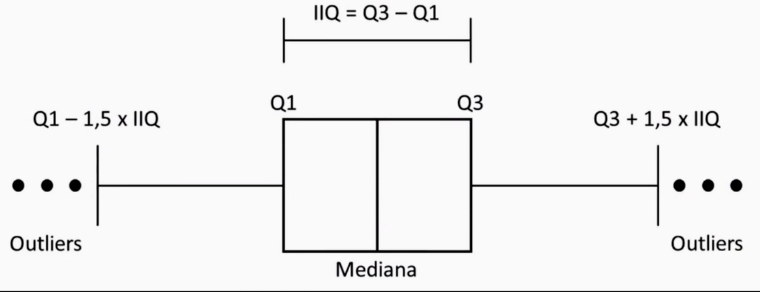

**Box-plot**

O boxplot, ou diagrama de caixa é, como o nome dá uma pista, uma caixa, ou seja, sua representação é um quadrado. No meio dessa caixa há uma linha, que chamamos de mediana, e é responsável por dividir nossos dados ao meio. Portanto, 50% dos dados estão na esquerda da caixa e os outros 50% estão na direita.

No canto superior esquerdo e no superior direito da caixa tem, sucessivamente, o Q1 e o Q3, que representam quartis, ou seja, valores que dividem o conjunto de dados em quatro partes iguais, cada uma contendo 25% dos dados. Então até Q1 temos 25% dos dados, representando o 1/4 com os menores dados.

A partir dele estão os 75% dos dados, onde o Q2 é a mediana e o Q3 contém os 25% dos dados que possui maior valor no banco de dados. Isso significa que até o Q3 tem 75% dos dados e, a partir dele, temos os 25% finais dos dados.

Acima do quadrado, e consequentemente do Q1 e Q3, temos o "IIQ = Q3-Q1". O IIQ representa o Intervalo Interquartil, que é a diferença do Q3 para o Q1.

À esquerda e à direita da caixa tem duas arestas. Na extremidade da aresta esquerda temos "Q1 - 1,5 x IIQ", que é a fórmula do nosso limite inferior. Na extremidade da aresta direita temos "Q3 + 1,5 x IIQ", que é a fórmula do limite superior. Os valores abaixo do limite inferior ou acima do limite superior são os chamados candidatos outliers, e é o que estamos procurando.

Eu apresentei o diagrama de caixa para o conhecermos. Antes de passarmos para ele, olharemos as estatísticas descritivas do nosso curso de dados. Para isso, em uma nova célula em branco, escreveremos df_sem_nulo.describe(). O df_sem_nulo é o DataFrame que estamos trabalhando, enquanto o .describe() é o método que estamos trabalhando.

In [107]:
df_sem_nulos.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


O método describe() é uma função muito útil na biblioteca Pandas que fornece estatísticas descritivas sobre as colunas numéricas de um DataFrame. Ele retorna informações como:

* **count**: número de amostras existentes.
* **mean**: média dos valores.
* **std**: desvio padrão.
* **min**: valor mínimo.
* **25%**: primeiro quartil (Q1), que representa os 25% menores valores.
* **50%**: segundo quartil (Q2), que é a mediana (o valor que divide o conjunto de dados ao meio).
* **75%**: terceiro quartil (Q3), que representa os 75% dos dados.
* **max**: valor máximo.

Em resumo, o describe() te dá um panorama geral da distribuição e das principais características dos seus dados numéricos, ajudando a identificar possíveis outliers e entender melhor o comportamento das suas variáveis.

Como identificamos na coluna cliente.tempo_servico existe um valor máximo de 1080, fazendo uma conta para sabermos o tempo de serviço em meses teremos o resuntado 1080/12 = 90, o que é estranho, pois quem assina um serviço por 90 anos? então ja sabemos que nessa conluna provavelmente tem outliers.

Usando o boxplot para visualizarmos de uma melhor forma, importaremos a biblioteca **`Seabor`** A biblioteca **`Seaborn`** é uma poderosa ferramenta de visualização de dados em Python, construída sobre o matplotlib. Ela oferece uma interface de alto nível para criar gráficos estatísticos informativos e atraentes.

Com o **`Seaborn`**, você pode:

* **Criar diversos tipos de gráficos**: histogramas, gráficos de dispersão, boxplots, gráficos de regressão, mapas de calor e muito mais.
* **Visualizar distribuições de dados**: entender como seus dados estão distribuídos e identificar padrões.
* C**omparar múltiplas variáveis**: analisar a relação entre diferentes variáveis no seu conjunto de dados.
* **Personalizar seus gráficos**: ajustar cores, estilos e outros elementos visuais para criar visualizações personalizadas.
Em resumo, o Seaborn é uma ferramenta essencial para qualquer pessoa que trabalhe com análise de dados em Python, permitindo criar visualizações claras e informativas para explorar e comunicar seus resultados.

In [108]:
 import seaborn as sns

<Axes: xlabel='cliente.tempo_servico'>

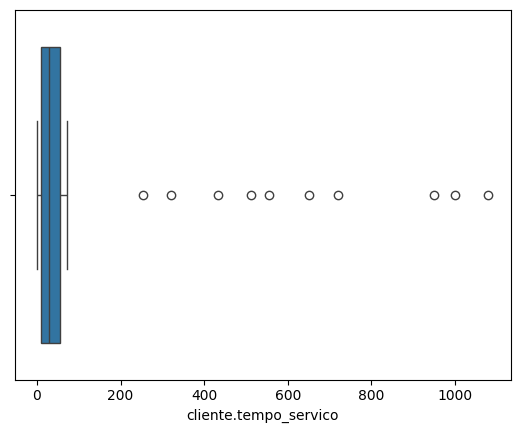

In [109]:
sns.boxplot(x=df_sem_nulos['cliente.tempo_servico'])

In [110]:
Q1 = df_sem_nulos['cliente.tempo_servico'].quantile(.25)
Q3 = df_sem_nulos['cliente.tempo_servico'].quantile(.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

In [111]:
outlier_index = (df_sem_nulos['cliente.tempo_servico'] < limite_inferior) | (df_sem_nulos['cliente.tempo_servico'] > limite_superior)
outlier_index

,cliente.tempo_servico
0,False
1,False
2,False
3,False
4,False
...,...
7001,False
7002,False
7003,False
7004,False


In [112]:
df_sem_nulos[outlier_index]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


# Substituindo valores para os outliers

In [114]:
df_sem_out = df_sem_nulos.copy()

In [117]:
df_sem_out[outlier_index]['cliente.tempo_servico']

,cliente.tempo_servico
1945,1080.0
1946,1000.0
1952,950.0
1956,254.0
1958,321.0
1963,650.0
1966,721.0
1970,555.0
1973,433.0
1974,512.0


In [118]:
df_sem_out.loc[outlier_index, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outlier_index, 'conta.cobranca.Total'] /
    df_sem_out.loc[outlier_index, 'conta.cobranca.mensal']
)

<Axes: xlabel='cliente.tempo_servico'>

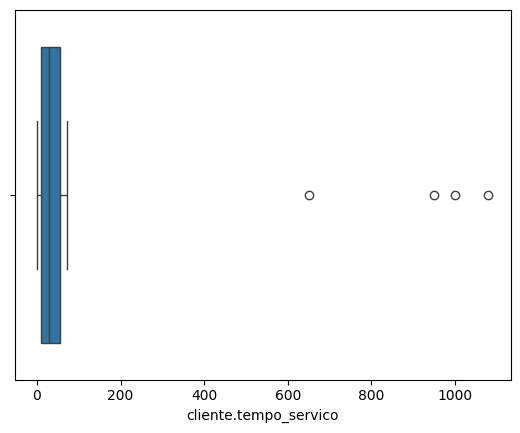

In [120]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [123]:
df_sem_out[outlier_index][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55
